In [94]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from sklearn.model_selection import StratifiedKFold, train_test_split

from keras.optimizers import Adam
from keras import regularizers

from preprocess import normalize

window_size_ms = 200.
samples_per_window = 20

In [70]:
#jason_width = 411.43
#jason_height = 774.857
#true_ranges = np.array([jason_width, jason_height])
#print(true_ranges.shape)

(2,)


In [87]:
jessy_width = 375
jessy_height = 812
true_ranges = np.array([jessy_width, jessy_height])

In [88]:
X = np.load("processed/jessyiPhone_X.npy")
has_touch_y = np.load("processed/jessyiPhone_has_touch_y.npy")
touch_loc_y = np.load("processed/jessyiPhone_touch_loc_y.npy")
X = X.reshape((-1, 120))
X = X[has_touch_y == 1]
touch_loc_y = touch_loc_y[has_touch_y == 1]
print(touch_loc_y[0:5])
touch_loc_y = touch_loc_y / true_ranges
print(touch_loc_y[0:5])

[[283.33332825 262.33332825]
 [ 22.66665649 398.        ]
 [131.         221.66665649]
 [337.66665649 132.66665649]
 [ 30.66665649 519.        ]]
[[0.75555554 0.3230706 ]
 [0.06044442 0.49014778]
 [0.34933333 0.27298849]
 [0.90044442 0.16338258]
 [0.08177775 0.63916256]]


In [89]:
print(X.shape)
print(touch_loc_y.shape)
print(np.ptp(X))
print(np.min(touch_loc_y))
print(np.max(touch_loc_y))

(1289, 120)
(1289, 2)
0.7018327227719272
0.010666666666666666
0.992


In [90]:
def build_model():
    model = Sequential()
    model.add(Dense(128, activation="relu", input_dim=(samples_per_window * 6)))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(128, activation="relu"))#, kernel_regularizer=regularizers.l2(0.003)))
    model.add(Dense(2, activation="linear", kernel_initializer="normal"))
    model.compile(loss="mean_squared_error", optimizer=SGD(lr=0.01, momentum=0.9), metrics = ["mse"])
    return model

In [107]:
def build_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(samples_per_window, 6)))
    model.add(Conv1D(filters=64, kernel_size=3, activation="relu"))
   # model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, activation="relu"))
   # model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dense(2, activation="linear", kernel_initializer="normal"))
    model.compile(loss="mean_squared_error", optimizer=SGD(lr=0.01, momentum=0.9), metrics = ["mse"])
    return model

In [76]:
kf = KFold(n_splits = 5, shuffle=True)
seed = 0

mses = []
histories = []

for train_idx, test_idx in kf.split(X, touch_loc_y):
    x_train, x_test = X[train_idx], X[test_idx]
    y_train, y_test = touch_loc_y[train_idx], touch_loc_y[test_idx]
    
    model = build_model()

    history = model.fit(x_train, y_train, epochs=300, batch_size=20, validation_data=(x_test, y_test))
    _, mse = model.evaluate(x_test, y_test)
    print("MSE: ", mse)
    mses.append(mse)
    histories.append(history)

Train on 496 samples, validate on 125 samples
Epoch 1/300
496/496 [==============================] - 0s - loss: 0.0917 - mean_squared_error: 0.0917 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 2/300
496/496 [==============================] - 0s - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 3/300
496/496 [==============================] - 0s - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 4/300
496/496 [==============================] - 0s - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 5/300
496/496 [==============================] - 0s - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 6/300
496/496 [==============================] - 0s - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 7/300
496/496 [=========

496/496 [==============================] - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 106/300
496/496 [==============================] - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 107/300
496/496 [==============================] - 0s - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 108/300
496/496 [==============================] - 0s - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 109/300
496/496 [==============================] - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 110/300
496/496 [==============================] - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 111/300
496/496 [==============================] - 0s - loss: 0.0080 - m

496/496 [==============================] - 0s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 210/300
496/496 [==============================] - 0s - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 211/300
496/496 [==============================] - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 212/300
496/496 [==============================] - 0s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 213/300
496/496 [==============================] - 0s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 214/300
496/496 [==============================] - 0s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 215/300
496/496 [==============================] - 0s - loss: 0.0071 - m

497/497 [==============================] - 0s - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 13/300
497/497 [==============================] - 0s - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 14/300
497/497 [==============================] - 0s - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 15/300
497/497 [==============================] - 0s - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 16/300
497/497 [==============================] - 0s - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 17/300
497/497 [==============================] - 0s - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 18/300
497/497 [==============================] - 0s - loss: 0.0109 - mean_sq

497/497 [==============================] - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 117/300
497/497 [==============================] - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 118/300
497/497 [==============================] - 0s - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 119/300
497/497 [==============================] - 0s - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 120/300
497/497 [==============================] - 0s - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 121/300
497/497 [==============================] - 0s - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 122/300
497/497 [==============================] - 0s - loss: 0.0081 - m

497/497 [==============================] - 0s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 221/300
497/497 [==============================] - 0s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 222/300
497/497 [==============================] - 0s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 223/300
497/497 [==============================] - 0s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 224/300
497/497 [==============================] - 0s - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 225/300
497/497 [==============================] - 0s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 226/300
497/497 [==============================] - 0s - loss: 0.0082 - m

497/497 [==============================] - 0s - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 25/300
497/497 [==============================] - 0s - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 26/300
497/497 [==============================] - 0s - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 27/300
497/497 [==============================] - 0s - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 28/300
497/497 [==============================] - 0s - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 29/300
497/497 [==============================] - 0s - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 30/300
497/497 [==============================] - 0s - loss: 0.0103 - mean_sq

497/497 [==============================] - 0s - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 129/300
497/497 [==============================] - 0s - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 130/300
497/497 [==============================] - 0s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 131/300
497/497 [==============================] - 0s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 132/300
497/497 [==============================] - 0s - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 133/300
497/497 [==============================] - 0s - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 134/300
497/497 [==============================] - 0s - loss: 0.0083 - m

497/497 [==============================] - 0s - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 233/300
497/497 [==============================] - 0s - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 234/300
497/497 [==============================] - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 235/300
497/497 [==============================] - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 236/300
497/497 [==============================] - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 237/300
497/497 [==============================] - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 238/300
497/497 [==============================] - 0s - loss: 0.0071 - m

497/497 [==============================] - 0s - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 37/300
497/497 [==============================] - 0s - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 38/300
497/497 [==============================] - 0s - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 39/300
497/497 [==============================] - 0s - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 40/300
497/497 [==============================] - 0s - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 41/300
497/497 [==============================] - 0s - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 42/300
497/497 [==============================] - 0s - loss: 0.0098 - mean_sq

497/497 [==============================] - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 141/300
497/497 [==============================] - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 142/300
497/497 [==============================] - 0s - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 143/300
497/497 [==============================] - 0s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 144/300
497/497 [==============================] - 0s - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 145/300
497/497 [==============================] - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 146/300
497/497 [==============================] - 0s - loss: 0.0080 - m

497/497 [==============================] - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 245/300
497/497 [==============================] - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 246/300
497/497 [==============================] - 0s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 247/300
497/497 [==============================] - 0s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 248/300
497/497 [==============================] - 0s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 249/300
497/497 [==============================] - 0s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 250/300
497/497 [==============================] - 0s - loss: 0.0067 - m

497/497 [==============================] - 0s - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 49/300
497/497 [==============================] - 0s - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 50/300
497/497 [==============================] - 0s - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 51/300
497/497 [==============================] - 0s - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 52/300
497/497 [==============================] - 0s - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 53/300
497/497 [==============================] - 0s - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 54/300
497/497 [==============================] - 0s - loss: 0.0090 - mean_sq

497/497 [==============================] - 0s - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 153/300
497/497 [==============================] - 0s - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 154/300
497/497 [==============================] - 0s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 155/300
497/497 [==============================] - 0s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 156/300
497/497 [==============================] - 0s - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 157/300
497/497 [==============================] - 0s - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 158/300
497/497 [==============================] - 0s - loss: 0.0074 - m

497/497 [==============================] - 0s - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 257/300
497/497 [==============================] - 0s - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 258/300
497/497 [==============================] - 0s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 259/300
497/497 [==============================] - 0s - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 260/300
497/497 [==============================] - 0s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 261/300
497/497 [==============================] - 0s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 262/300
497/497 [==============================] - 0s - loss: 0.0058 - m

In [77]:
print(mses)
print(np.mean(mses))

[0.00965166499465704, 0.010596859058545481, 0.008149004451209498, 0.007180317252453777, 0.010248948594615344]
0.009165358870296228


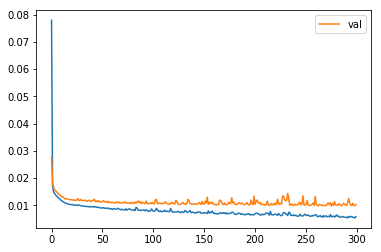

In [78]:
plt.plot(histories[4].history["loss"])
plt.plot(histories[4].history["val_loss"], label="val")
plt.legend()

/Users/jessy/.virtualenvs/cocosci/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


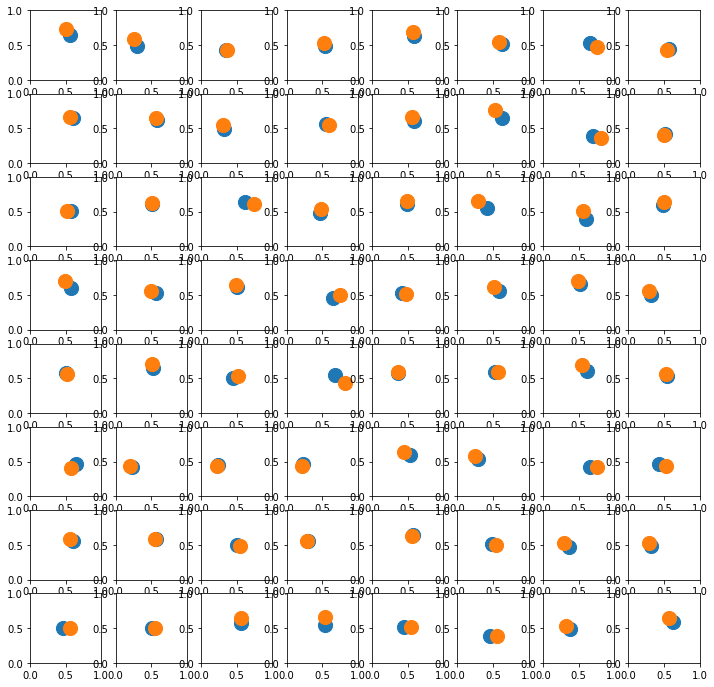

In [80]:
# PLOT ** TRAIN ** RESULTS

nrows = 8
ncols = 8

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))
axes = axes.reshape(-1)

for i in range(nrows * ncols):
    axes[i].scatter(*model.predict(x_train)[60+i], s=200)
    axes[i].scatter(*y_train[60+i], s=200)
    
    axes[i].set_xlim(0, 1)
    axes[i].set_ylim(0, 1)

fig.show()

In [108]:
x_train, x_test, y_train, y_test = train_test_split(X, touch_loc_y, test_size=0.1)
model = build_model()
history = model.fit(x_train, y_train, epochs=200, batch_size=20, validation_data=(x_test, y_test))

ValueError: Error when checking input: expected dense_184_input to have 2 dimensions, but got array with shape (1160, 20, 6)

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"], label="val")
plt.legend()

ValueError: Error when checking : expected dense_172_input to have 2 dimensions, but got array with shape (129, 20, 6)

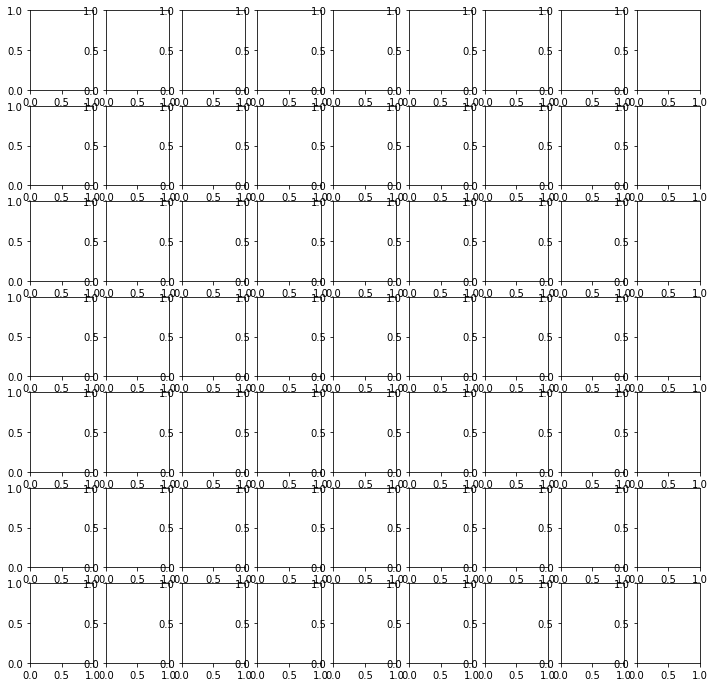

In [101]:
nrows = 7
ncols = 9

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))
axes = axes.reshape(-1)

for i in range(nrows * ncols):
    axes[i].scatter(*model.predict(x_test)[i], s=200)
    axes[i].scatter(*y_test[i], s=200)
    
    axes[i].set_xlim(0, 1)
    axes[i].set_ylim(0, 1)

fig.show()

In [109]:
X = X.reshape(-1, 20, 6)
x_train, x_test, y_train, y_test = train_test_split(X, touch_loc_y, test_size=0.1)
cnn_model = build_cnn_model()
history = cnn_model.fit(x_train, y_train, epochs=500, batch_size=20, validation_data=(x_test, y_test))

Train on 1160 samples, validate on 129 samples
Epoch 1/500
1160/1160 [==============================] - 0s - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.0496 - val_mean_squared_error: 0.0496
Epoch 2/500
1160/1160 [==============================] - 0s - loss: 0.0566 - mean_squared_error: 0.0566 - val_loss: 0.0520 - val_mean_squared_error: 0.0520
Epoch 3/500
1160/1160 [==============================] - 0s - loss: 0.0559 - mean_squared_error: 0.0559 - val_loss: 0.0514 - val_mean_squared_error: 0.0514
Epoch 4/500
1160/1160 [==============================] - 0s - loss: 0.0549 - mean_squared_error: 0.0549 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 5/500
1160/1160 [==============================] - 0s - loss: 0.0538 - mean_squared_error: 0.0538 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 6/500
1160/1160 [==============================] - 0s - loss: 0.0520 - mean_squared_error: 0.0520 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 7/500
1160/

1160/1160 [==============================] - 0s - loss: 0.0402 - mean_squared_error: 0.0402 - val_loss: 0.0352 - val_mean_squared_error: 0.0352
Epoch 53/500
1160/1160 [==============================] - 0s - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.0303 - val_mean_squared_error: 0.0303
Epoch 54/500
1160/1160 [==============================] - 0s - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
Epoch 55/500
1160/1160 [==============================] - 0s - loss: 0.0396 - mean_squared_error: 0.0396 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 56/500
1160/1160 [==============================] - 0s - loss: 0.0379 - mean_squared_error: 0.0379 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 57/500
1160/1160 [==============================] - 0s - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 58/500
1160/1160 [==============================] - 0s - loss: 0.

1160/1160 [==============================] - 0s - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 105/500
1160/1160 [==============================] - 0s - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 106/500
1160/1160 [==============================] - 0s - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 107/500
1160/1160 [==============================] - 0s - loss: 0.0367 - mean_squared_error: 0.0367 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 108/500
1160/1160 [==============================] - 0s - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.0311 - val_mean_squared_error: 0.0311
Epoch 109/500
1160/1160 [==============================] - 0s - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 110/500
1160/1160 [==============================] - 0s - lo

1160/1160 [==============================] - 0s - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 156/500
1160/1160 [==============================] - 0s - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 157/500
1160/1160 [==============================] - 0s - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 158/500
1160/1160 [==============================] - 0s - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 159/500
1160/1160 [==============================] - 0s - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 160/500
1160/1160 [==============================] - 0s - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 161/500
1160/1160 [==============================] - 0s - lo

1160/1160 [==============================] - 0s - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 207/500
1160/1160 [==============================] - 0s - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 208/500
1160/1160 [==============================] - 0s - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 209/500
1160/1160 [==============================] - 0s - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 210/500
1160/1160 [==============================] - 0s - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 211/500
1160/1160 [==============================] - 0s - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 212/500
1160/1160 [==============================] - 0s - lo

1160/1160 [==============================] - 0s - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 258/500
1160/1160 [==============================] - 0s - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0307 - val_mean_squared_error: 0.0307
Epoch 259/500
1160/1160 [==============================] - 0s - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 260/500
1160/1160 [==============================] - 0s - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 261/500
1160/1160 [==============================] - 0s - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 262/500
1160/1160 [==============================] - 0s - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 263/500
1160/1160 [==============================] - 0s - lo

1160/1160 [==============================] - 0s - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 309/500
1160/1160 [==============================] - 0s - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 310/500
1160/1160 [==============================] - 0s - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 311/500
1160/1160 [==============================] - 0s - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch 312/500
1160/1160 [==============================] - 0s - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 313/500
1160/1160 [==============================] - 0s - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 314/500
1160/1160 [==============================] - 0s - lo

1160/1160 [==============================] - 0s - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch 360/500
1160/1160 [==============================] - 0s - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 361/500
1160/1160 [==============================] - 0s - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0217 - val_mean_squared_error: 0.0217
Epoch 362/500
1160/1160 [==============================] - 0s - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0217 - val_mean_squared_error: 0.0217
Epoch 363/500
1160/1160 [==============================] - 0s - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
Epoch 364/500
1160/1160 [==============================] - 0s - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch 365/500
1160/1160 [==============================] - 0s - lo

1160/1160 [==============================] - 0s - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 411/500
1160/1160 [==============================] - 0s - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 412/500
1160/1160 [==============================] - 0s - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 413/500
1160/1160 [==============================] - 0s - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
Epoch 414/500
1160/1160 [==============================] - 0s - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch 415/500
1160/1160 [==============================] - 0s - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0199 - val_mean_squared_error: 0.0199
Epoch 416/500
1160/1160 [==============================] - 0s - lo

1160/1160 [==============================] - 0s - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 462/500
1160/1160 [==============================] - 0s - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 463/500
1160/1160 [==============================] - 0s - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 464/500
1160/1160 [==============================] - 0s - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 465/500
1160/1160 [==============================] - 0s - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 466/500
1160/1160 [==============================] - 0s - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 467/500
1160/1160 [==============================] - 0s - lo

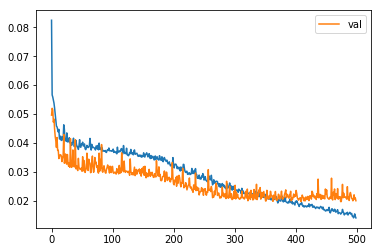

In [110]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"], label="val")
plt.legend()

(array([84., 23.,  9.,  4.,  2.,  2.,  2.,  0.,  0.,  3.]),
 array([2.97616810e-05, 3.14764383e-02, 6.29231149e-02, 9.43697915e-02,
        1.25816468e-01, 1.57263145e-01, 1.88709821e-01, 2.20156498e-01,
        2.51603174e-01, 2.83049851e-01, 3.14496528e-01]),
 <a list of 10 Patch objects>)

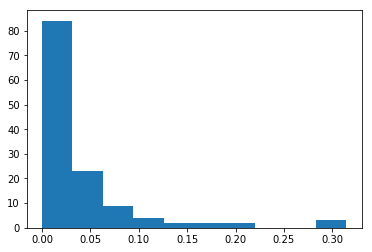

In [118]:
plt.hist(np.sum((cnn_model.predict(x_test) - y_test)**2, axis=1))

/Users/jessy/.virtualenvs/cocosci/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


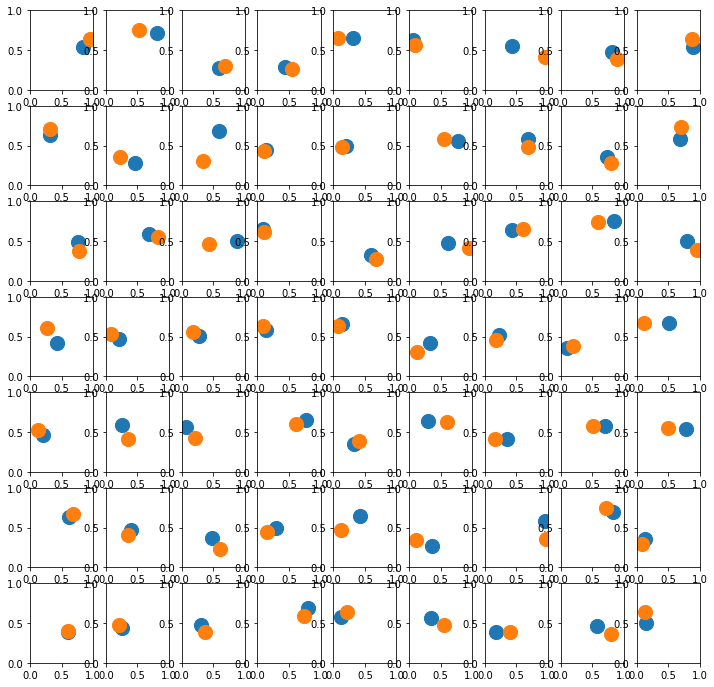

In [111]:
nrows = 7
ncols = 9

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))
axes = axes.reshape(-1)

for i in range(nrows * ncols):
    axes[i].scatter(*cnn_model.predict(x_test)[i], s=200)
    axes[i].scatter(*y_test[i], s=200)
    
    axes[i].set_xlim(0, 1)
    axes[i].set_ylim(0, 1)

fig.show()

In [119]:
cnn_model.save("touch_loc_model_cnn.h5")

In [83]:
model.save("touch_loc_model.h5")